In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# For clean output
import warnings as wrn
wrn.simplefilter(action='ignore', category=FutureWarning)

In [4]:
penguins = sns.load_dataset('penguins')

penguins.columns = ['species', 'location', 'penguins_length', 'penguins_depth', 'flipper_length', 'body_mass', 'gender']
palette = {'Adelie': 'orange', 'Chinstrap': 'green', 'Gentoo': 'purple'}


In [5]:
columns = ['penguins_length', 'penguins_depth', 'flipper_length', 'body_mass']

for column in columns:
    penguins[column] = penguins[column].replace(0, np.nan)
    mean = int(penguins[column].mean(skipna=True))
    penguins[column] = penguins[column].replace(np.nan, mean)

<Axes: xlabel='penguins_length', ylabel='penguins_depth'>

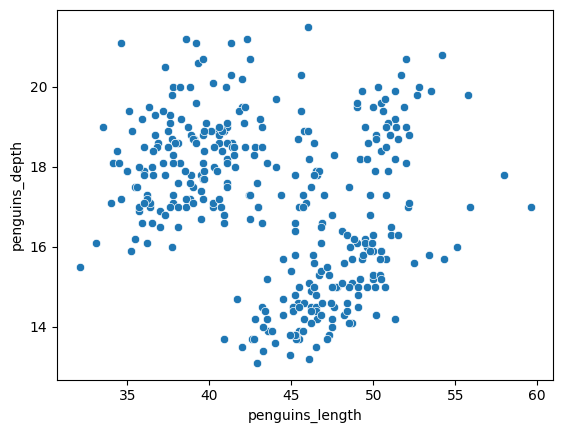

In [6]:
sns.scatterplot(data=penguins, x='penguins_length', y = 'penguins_depth')

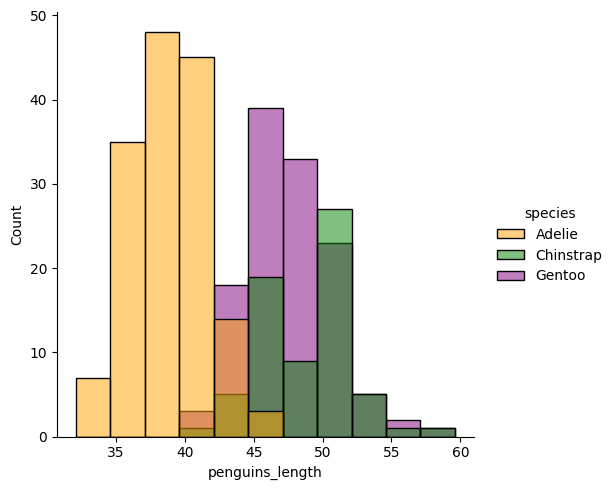

In [7]:
sns.displot(data=penguins, x='penguins_length', hue='species', palette=palette)

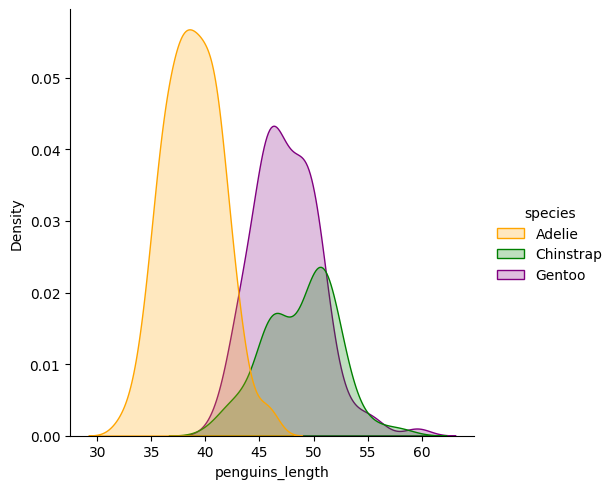

In [8]:
sns.displot(data=penguins, x='penguins_length', hue='species', palette=palette, kind='kde', fill=True)

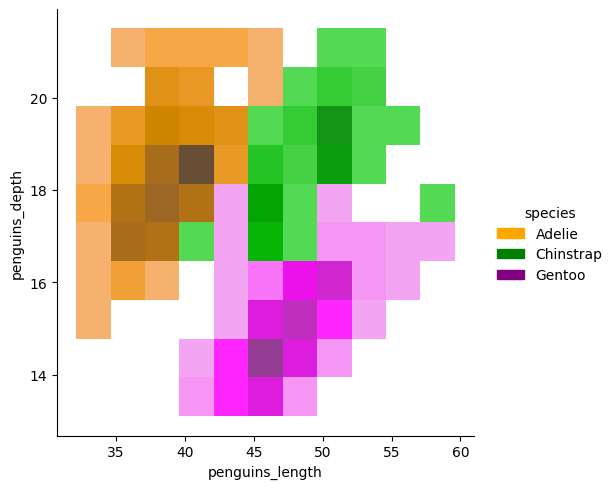

In [9]:
sns.displot(data=penguins, x='penguins_length', y='penguins_depth', hue='species', palette=palette)

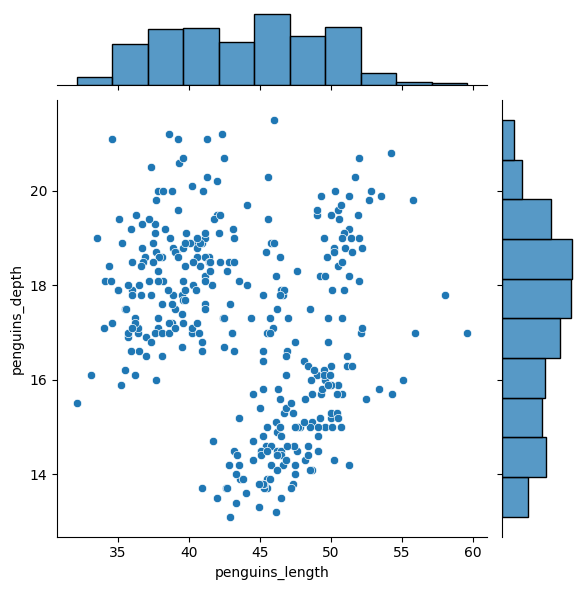

In [10]:
sns.jointplot(data=penguins, x='penguins_length', y='penguins_depth')

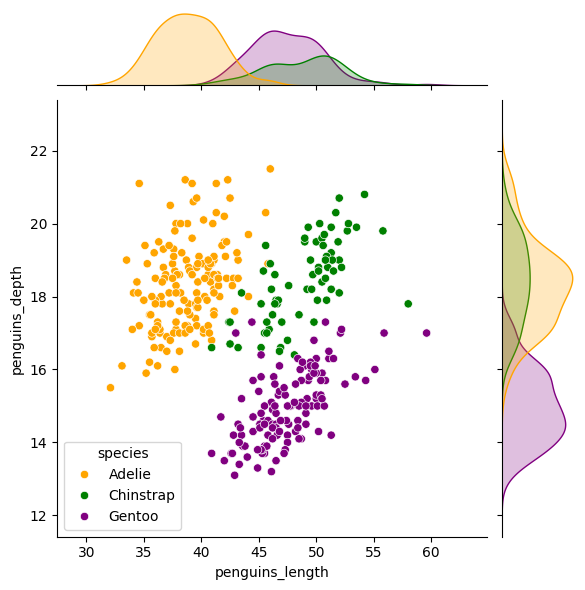

In [11]:
sns.jointplot(data=penguins, x='penguins_length', y='penguins_depth', hue='species', palette=palette)

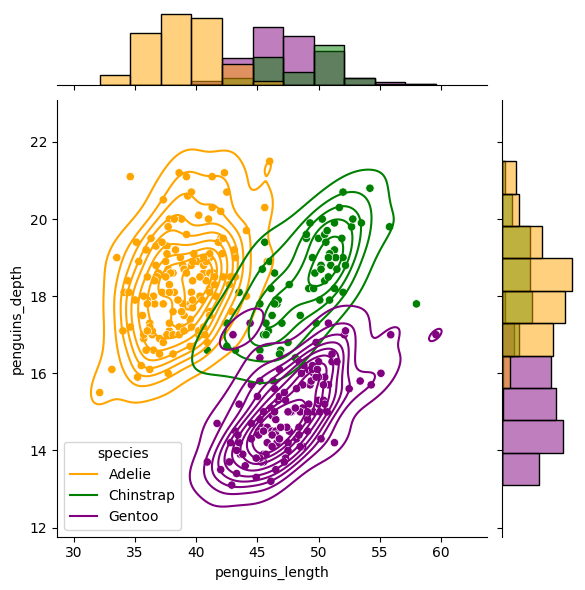

In [12]:
g = sns.jointplot(data=penguins, x='penguins_length', y='penguins_depth', hue='species', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

In [13]:
X = penguins[['penguins_length', 'penguins_depth', 'flipper_length', 'body_mass']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23520131)

In [14]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred_1 = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_1)

y_pred_2 = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_2)

print("Test Accuracy: ", accuracy_test)
print("Train Accuracy: ", accuracy_train)

Test Accuracy:  0.9134615384615384
Train Accuracy:  1.0


In [15]:
# For the test datasets:
# max_depth = 2 -> the accuracy is approx. 0.90385
# max_depth = 3 -> the accuracy is approx. 0.90385
# max_depth = 4 -> the accuracy is approx. 0.91346
# max_depth = 5 -> the accuracy is approx. 0.91346
# max_depth = 10 -> the accuracy is approx. 0.91346
# max_depth = 15 -> the accuracy is approx. 0.91346
# max_depth = 20 -> the accuracy is approx. 0.91346
# ...

# For the train datasets:
# max_depth = 2 -> the accuracy is approx. 0.98333
# max_depth = 3 -> the accuracy is approx. 0.98333
# max_depth = 4 -> the accuracy is approx. 0.99583
# max_depth = 5 -> the accuracy is approx. 0.99583
# max_depth = 6 -> the accuracy is 1.0
# max_depth = 10 -> the accuracy is 1.0
# max_depth = 15 -> the accuracy is 1.0
# max_depth = 20 -> the accuracy is 1.0
# ...

# Nhận xét:
# Hàm penguins dựa vào 4 chỉ số của các loài.
# Có thể thấy rằng mô hình dự đoán chính xác cho hầu hết các dự liệu trong tập test và tập train nhưng có thể overfitting.
# Đối với tập test:
# Khi max_depth = 2, 3 thì mô hình đặt độ chính xác cao, xấp xỉ 0.90385.
# Khi max_depth >= 4 thì độ chính xác bắt đầu tăng dần đến tương đương 0.91346. (Đồng nghĩa với việc đây có thể xem là giới hạn độ chính xác)
# Đối với tập train:
# Khi max_depth = 2, 3 thì độ chính xác đạt 0.98333.
# Khi max_depth = 4, 5 thì độ chính xác tăng lên một ít, xấp xỉ 0.99583.
# Khi max_depth >= 6 thì độ chính xác đạt 1.0 tương đương 100%.
# Kết luận:
# 1. Mô hình đạt độ chính xác tương đối, max_depth càng tăng thì độ chính xác tăng càng chậm.
# 2. Mô hình có thể gây ra hiện tượng overfitting.
